In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [2]:
import warnings
warnings.filterwarnings('ignore')

# LIBRARY IMPORT
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
from scipy.stats import pearsonr
from mpl_toolkits.basemap import Basemap, cm

In [3]:
# Load intensification rate data
int_rate = pd.read_csv('Data/computed-data/computed_annual-intensification-rate_JTWC.csv')

# Load intensification duration data
int_dur = pd.read_csv('Data/computed-data/computed_annual-intensification-duration_JTWC.csv')

In [4]:
# Load sea surface temperature data
sst = xr.open_dataset('Data/SST/raw-data_West-Pacific-sst.nc')

sst = sst.to_dataframe().reset_index()
sst['year']  = sst['time'].apply(lambda x: x.year)
sst['month']  = sst['time'].apply(lambda x: x.month)

In [5]:
# Calculate seasonal mean for data
sst_season_mean = sst[sst['month'].between(7,9)]
sst_season_mean = sst_season_mean.groupby(['latitude','longitude','year'])['sst'].mean().reset_index()

### Duration Correlation with Seasonal SST

In [6]:
# Define function to find correlation
def find_corr_duration(data):
    return pearsonr(data['sst'].values,int_dur['Intensification Duration'].values)[0]

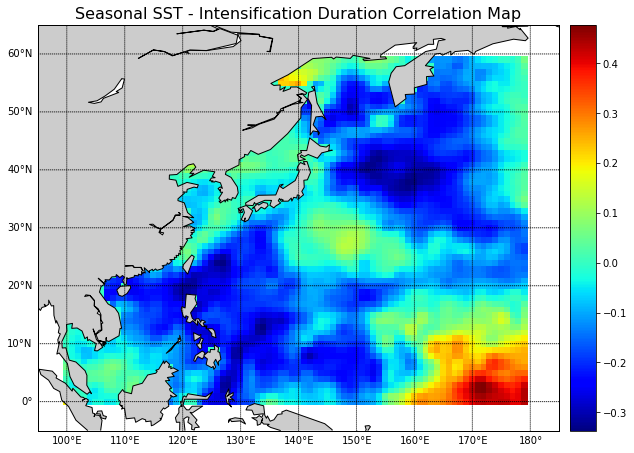

In [7]:
sst_season_corr = sst_season_mean.groupby(['latitude','longitude']).apply(find_corr_duration).rename('corr')
sst_season_corr = sst_season_corr.to_frame()
sst_season_corr = xr.Dataset.from_dataframe(sst_season_corr)

sst_season_corr = sst_season_corr.fillna(0)

data = sst_season_corr.variables['corr'][:]
lats = sst_season_corr.variables['latitude'][:]
lons = sst_season_corr.variables['longitude'][:]

# Width of the map used is set to be 1,000 km
width = 1e6

# Determine whether the cyclone move into the big box
map = Basemap(projection='cyl',resolution='c',llcrnrlon=95,\
        llcrnrlat=-5,urcrnrlon=185,urcrnrlat=65)

im1 = map.pcolormesh(lons, lats, data,cmap=plt.cm.jet,latlon=True)

cb = map.colorbar(im1,"right", size="5%", pad="2%")

# make image bigger:
plt.title('Seasonal SST - Intensification Duration Correlation Map', fontsize=16)
plt.gcf().set_size_inches(10,10)
map.drawcoastlines()
map.drawmapboundary()
map.fillcontinents()
map.drawparallels(np.arange(-90.,91.,10.),labels=[True,False,False,True])
map.drawmeridians(np.arange(-180.,181.,10.),labels=[True,False,False,True])

plt.show()

### Duration Correlation with Annual SST

In [8]:
# Calculate annual mean for data
sst_annual_mean = sst.groupby(['latitude','longitude','year'])['sst'].mean().reset_index()

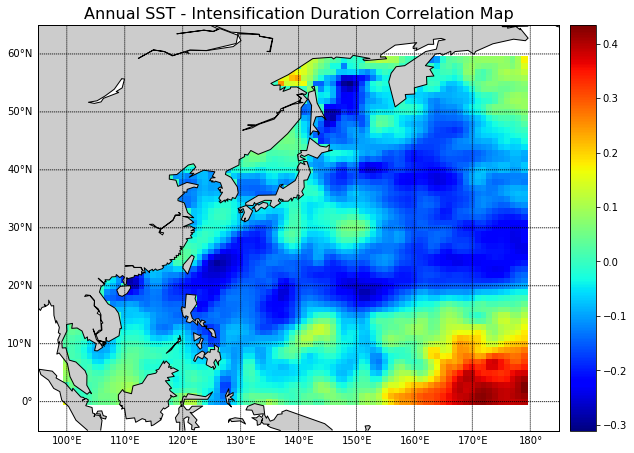

In [9]:
sst_annual_corr = sst_annual_mean.groupby(['latitude','longitude']).apply(find_corr_duration).rename('corr')
sst_annual_corr = sst_annual_corr.to_frame()

sst_annual_corr = xr.Dataset.from_dataframe(sst_annual_corr)

sst_annual_corr = sst_annual_corr.fillna(0)

data = sst_annual_corr.variables['corr'][:]
lats = sst_annual_corr.variables['latitude'][:]
lons = sst_annual_corr.variables['longitude'][:]

# Width of the map used is set to be 1,000 km
width = 1e6

# Determine whether the cyclone move into the big box
map = Basemap(projection='cyl',resolution='c',llcrnrlon=95,\
        llcrnrlat=-5,urcrnrlon=185,urcrnrlat=65)

im1 = map.pcolormesh(lons, lats, data,cmap=plt.cm.jet,latlon=True)

cb = map.colorbar(im1,"right", size="5%", pad="2%")

# make image bigger:
plt.title('Annual SST - Intensification Duration Correlation Map', fontsize=16)
plt.gcf().set_size_inches(10,10)
map.drawcoastlines()
map.drawmapboundary()
map.fillcontinents()
map.drawparallels(np.arange(-90.,91.,10.),labels=[True,False,False,True])
map.drawmeridians(np.arange(-180.,181.,10.),labels=[True,False,False,True])

plt.show()

### Intensification Rate Correlation with Seasonal SST

In [10]:
# Define function to find correlation
def find_corr_rate(data):
    return pearsonr(data['sst'].values,int_rate['Intensification Rate'].values)[0]

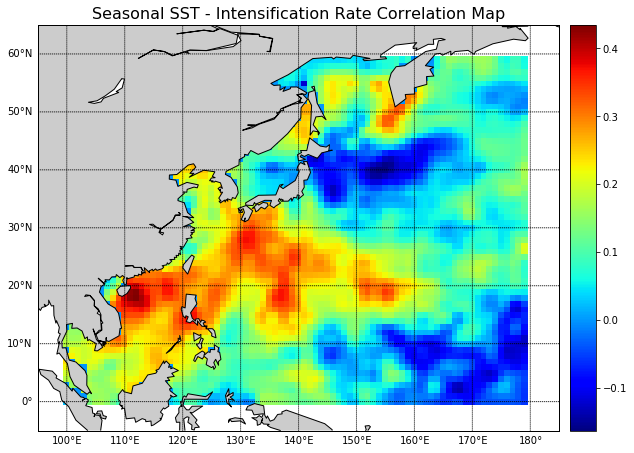

In [11]:
sst_season_corr = sst_season_mean.groupby(['latitude','longitude']).apply(find_corr_rate).rename('corr')
sst_season_corr = sst_season_corr.to_frame()
sst_season_corr = xr.Dataset.from_dataframe(sst_season_corr)

sst_season_corr = sst_season_corr.fillna(0)

data = sst_season_corr.variables['corr'][:]
lats = sst_season_corr.variables['latitude'][:]
lons = sst_season_corr.variables['longitude'][:]

# Width of the map used is set to be 1,000 km
width = 1e6

# Determine whether the cyclone move into the big box
map = Basemap(projection='cyl',resolution='c',llcrnrlon=95,\
        llcrnrlat=-5,urcrnrlon=185,urcrnrlat=65)

im1 = map.pcolormesh(lons, lats, data,cmap=plt.cm.jet,latlon=True)

cb = map.colorbar(im1,"right", size="5%", pad="2%")

# make image bigger:
plt.title('Seasonal SST - Intensification Rate Correlation Map', fontsize=16)
plt.gcf().set_size_inches(10,10)
map.drawcoastlines()
map.drawmapboundary()
map.fillcontinents()
map.drawparallels(np.arange(-90.,91.,10.),labels=[True,False,False,True])
map.drawmeridians(np.arange(-180.,181.,10.),labels=[True,False,False,True])

plt.show()

### Intensification Rate Correlation with Annual SST

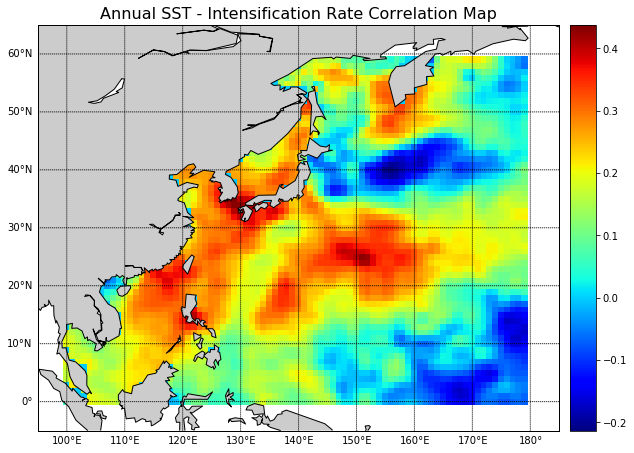

In [12]:
sst_annual_corr = sst_annual_mean.groupby(['latitude','longitude']).apply(find_corr_rate).rename('corr')
sst_annual_corr = sst_annual_corr.to_frame()

sst_annual_corr = xr.Dataset.from_dataframe(sst_annual_corr)

sst_annual_corr = sst_annual_corr.fillna(0)

data = sst_annual_corr.variables['corr'][:]
lats = sst_annual_corr.variables['latitude'][:]
lons = sst_annual_corr.variables['longitude'][:]

# Width of the map used is set to be 1,000 km
width = 1e6

# Determine whether the cyclone move into the big box
map = Basemap(projection='cyl',resolution='c',llcrnrlon=95,\
        llcrnrlat=-5,urcrnrlon=185,urcrnrlat=65)

im1 = map.pcolormesh(lons, lats, data,cmap=plt.cm.jet,latlon=True)

cb = map.colorbar(im1,"right", size="5%", pad="2%")

# make image bigger:
plt.title('Annual SST - Intensification Rate Correlation Map', fontsize=16)
plt.gcf().set_size_inches(10,10)
map.drawcoastlines()
map.drawmapboundary()
map.fillcontinents()
map.drawparallels(np.arange(-90.,91.,10.),labels=[True,False,False,True])
map.drawmeridians(np.arange(-180.,181.,10.),labels=[True,False,False,True])

plt.show()